# Constrained Optimization

Teng-Jui Lin

Content adapted from UW AMATH 301, Beginning Scientific Computing. Although not covered in Spring 2020, the topic is presented in previous years in [Linear Programming and Genetic Algorithms](https://www.youtube.com/watch?v=wiQOsH8C-uQ).

- Constrained optimization methods
    - Linear programming
    - Genetic algorithm
- `scipy` implementations
    - Linear programming by [`scipy.optimize.linprog()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html)
    - Genetic algorithm by [`scipy.optimize.differential_evolution()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html)

## Linear programming

When the objective function is linear and the constraints consist of linear inequalities and equalities, the optimization problem is called a linear program. Linear programming solved by [`scipy.optimize.linprog()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html) minimizes the linear objective function

$$
\min_\mathbf{x} \mathbf{c}^T\mathbf{x}
$$

subjected to linear constraints

$$
\mathbf{Ax \le b} \\
\mathbf{\bar{A}x=\bar{b}} \\
\mathbf{x}_{\text{low}} \le \mathbf{x} \le \mathbf{x}_{\text{high}}
$$

### Implementation

**Problem Statement.** Minimizing mixture cost. (Adapted from *Precalculus: Functions and Graphs* 12e by Swokowski and Cole, Section 8.5 Problem 23)

Three substances, X, Y, and Z, each contain four ingredients, A, B, C, and D. The percentage of each ingredient and the cost in cents per kg of each substance are given in the following table.

|Substance|A [%]|B [%]|C [%]|D [%]|Cost per kg [$]|
|:-:|-:|-:|-:|-:|-:|
|X|20|10|25|45|25|
|Y|20|40|15|25|35|
|Z|10|20|25|45|50|

The labor fee for mixing is $10. How many kg of each substance should be combined to obtain a mixture of 20 kg containing at least 14% A, 16% B, and 20% C, so that the mixing cost is minimal? maximal?

**Solution.** Suppose we need $x$ kg X, $y$ kg Y, and $z$ kg Z (with implicit bound of being nonnegative). The objective function we want to minimize is the cost function

$$
C = 25x + 35y + 50z + 10
$$

The total mass of 20 kg gives an equality constraint

$$
x + y + z = 20
$$

and the component mass gives inequality constraints

$$
\begin{aligned}
0.20x + 0.20y + 0.10z \ge 0.14 \times 20 \\
0.10x + 0.40y + 0.20z \ge 0.16 \times 20 \\
0.25x + 0.15y + 0.25z \ge 0.20 \times 20
\end{aligned}
$$

since the standard form requires less than or equal to sign, we need to multiply -1 on both sides to flip the sign.

---

Convert to standard form, we have the coefficients of the objective function

$$
\boxed{
\mathbf{c} =
\begin{bmatrix}
25 \\ 35 \\ 50
\end{bmatrix}
}
$$

Note that the mixing labor cost of 10 dollars is not included because a shift in the function will not affect the minimum or maximum. We do keep in mind of the 10 dollars if we're calculating the minimum or maximum value.

Convert the inequality constraints to the standard form

$$
\mathbf{Ax \le b}
$$

where

$$
\boxed{
\mathbf{A} = -
\begin{bmatrix}
0.20 & 0.20 & 0.10 \\
0.10 & 0.40 & 0.20 \\
0.25 & 0.15 & 0.25
\end{bmatrix},
\mathbf{x} =
\begin{bmatrix}
x \\ y \\ z
\end{bmatrix},
\mathbf{b} = -
\begin{bmatrix}
0.14 \times 20 \\
0.16 \times 20 \\
0.20 \times 20
\end{bmatrix}
}
$$

(note the negative signs) and the equality constraint

$$
\mathbf{\bar{A}x=\bar{b}}
$$

where

$$
\boxed{
\mathbf{\bar{A}} =
\begin{bmatrix}
1 & 1 & 1
\end{bmatrix},
\mathbf{x} =
\begin{bmatrix}
x \\ y \\ z
\end{bmatrix},
\mathbf{\bar{b}} =
\begin{bmatrix}
20
\end{bmatrix}
}
$$

with bounds

$$
\mathbf{x}_{\text{low}} \le \mathbf{x}
$$

where

$$
\boxed{
\mathbf{x}_{\text{low}} =
\begin{bmatrix}
0 \\ 0 \\ 0
\end{bmatrix},
\mathbf{x} =
\begin{bmatrix}
x \\ y \\ z
\end{bmatrix}
}
$$

We can now solve the linear program using [`scipy.optimize.linprog()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html).

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import optimize

In [18]:
# define linear program parameters
labor_cost = 10
objec_func_coeff = np.array([30, 35, 10])
A_ineq = -np.array([[0.1, 0.2, 0.1], [0.1, 0.4, 0.2], [0.25, 0.15, 0.25]])
b_ineq = -20 * np.array([0.14, 0.16, 0.2])
A_eq = np.array([[1, 1, 1]])
b_eq = np.array([20])
bounds = np.array([[0, None], [0, None], [0, None]])

In [19]:
# linear programming
min_soln = scipy.optimize.linprog(objec_func_coeff, A_ub=A_ineq, b_ub=b_ineq, A_eq=A_eq, b_eq=b_eq, bounds=bounds)
min_soln

     con: array([2.10902869e-08])
     fun: 399.9999993339417
 message: 'Optimization terminated successfully.'
     nit: 6
   slack: array([-4.00015709e-09,  2.39999999e+00,  1.99999997e-01])
  status: 0
 success: True
       x: array([8.81328635e-10, 7.99999998e+00, 1.20000000e+01])

In [20]:
# display min soln
if min_soln.status == 0:
    print(f'x = {min_soln.x[0] :.1f} kg')
    print(f'y = {min_soln.x[1] :.1f} kg')
    print(f'z = {min_soln.x[2] :.1f} kg')
    print(f'C_min = $ {min_soln.fun + labor_cost :.1f}')  # note the labor cost
else:
    print(min_soln.message)

x = 0.0 kg
y = 8.0 kg
z = 12.0 kg
C_min = $ 410.0


To solve for maximum, multiply -1 to the objective function. Therefore, we add a negative sign to the objective function coefficients.

In [21]:
# solve for maximum
objec_func_coeff = -np.array([30, 35, 10])

In [22]:
# linear programming
max_soln = scipy.optimize.linprog(objec_func_coeff, A_ub=A_ineq, b_ub=b_ineq, A_eq=A_eq, b_eq=b_eq, bounds=bounds)

In [23]:
# display max soln
if max_soln.status == 0:
    print(f'x = {max_soln.x[0] :.1f} kg')
    print(f'y = {max_soln.x[1] :.1f} kg')
    print(f'z = {max_soln.x[2] :.1f} kg')
    print(f'C_min = $ {-max_soln.fun + labor_cost :.1f}')  # note the negative sign and the labor cost
else:
    print(max_soln.message)

x = 10.0 kg
y = 10.0 kg
z = 0.0 kg
C_min = $ 660.0


## Genetic algorithm

For nonconvex, nonlinear functions, genetic algorithm is the last hope for optimization. One form of genetic algorithm minimizes an objective function $\min f(x)$ by

1. Guess $n$ points $\mathbf{x}_{\text{guess}, i} = \{x_1, x_2, \dots, x_n\}$
2. Evaluate the $n$ points with the objective function $\mathbf{y}_{\text{guess}, i} = \{f(x_1), f(x_2), \dots, f(x_n)\}$
3. Keep $p$ points in $\mathbf{x}_{\text{guess}, i}$ that has the smallest objective function $\mathbf{y}_{\text{guess}, i}$, denote as $\mathbf{x}_{\text{best}, i}$
4. Discard the other $n-p$ points
5. Permute the $p$ points in $\mathbf{x}_{\text{best}, i}$ for $\frac{n}{p}-1$ times to generate a total of $n$ points $\mathbf{x}_{\text{guess}, i+1}$
6. Use $\mathbf{x}_{\text{guess}, i+1}$ to repeat the above steps

Genetic algorithm does not guarantee optimal solution and may be slow, but it is the last hope for optimizing nonconvex and nonlinear objective functions.

### Implementation

We first implement our own genetic algorithm; we then explore scipy implementation of [`scipy.optimize.differential_evolution()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html).

**Problem Statement.** Use the functional form

$$
A \cos(Bx) + C
$$

to fit the data

`[75, 77, 76, 73, 69, 68, 63, 59, 57, 55, 54, 52, 50, 50, 49, 49, 49, 50, 54, 56, 59, 63, 67, 72]`

using

- genetic algorithm implementation
- genetic algorithm by `scipy.optimize.differential_evolution()`
- general curve fitting by `scipy.optimize.curve_fit()`
- minimization of sum of squared error by `scipy.optimize.fmin()`

Compare their performance.

#### Genetic algorithm implementation

In [24]:
# given data
data_y = np.array([75, 77, 76, 73, 69, 68, 63, 59, 57, 55, 54, 52, 50, 50, 49, 49, 49, 50, 54, 56, 59, 63, 67, 72])
data_x = np.arange(len(data_y))

In [25]:
def func(x, A, B, C):
    return A*np.cos(B*x) + C

def sse(coeffs):
    '''Custom sum of squared error for the problem.'''
    return np.sum((func(data_x, *coeffs) - data_y)**2)

In [26]:
def genetic_algorithm(func, initial_guess, guesses=200, keep=10, tolerance=1e-8, max_generation=200, seed=None):
    '''
    Minimize a function using genetic algorithm.
    
    :param func: objective function
    :param initial_guess: initial guess to the parameters of objective function
    :param guesses: amount of candidate guesses generated each generation
    :param keep: amount of guesses with minimum function error is kept to the next generation
    :param tolerance: tolerance of stopping criteria
    :param max_generation: maximum generation (iteration) allowed for calculation
    :param seed: random seed for np.random.randn
    :returns: parameters of objective function with minimum function value
    '''
    # iteration counter
    generation = 1
    # model parameters
    mutate = guesses - keep
    mutate_multiple = int((guesses - keep)/keep)
    # stopping critera
    error = np.full(guesses, tolerance*2)
    
    # initial guesses
    if seed is not None:
        np.random.seed(seed)
    Ak = (np.array([initial_guess]) + np.random.randn(guesses, 3)).T
    
    # genetic algotirhm logic
    while np.min(error) > tolerance and generation < max_generation:
        for j in range(guesses):
            error[j] = func(Ak[:, j])
        min_indices = np.argsort(error)[:keep]
        # keep the few with minimal error
        Ak[:, :keep] = Ak[:, min_indices]
        # discard the rest
        # perturb the few with minimal error, with decreasing perturbation each generation
        Ak[:, keep:] = np.tile(Ak[:, min_indices], mutate_multiple) + np.random.randn(3, mutate)/generation
        generation += 1
        
    # iteration and error display
    print(f'generation = {generation}')
    print(f'error func value = {np.min(error) :.2e}')
    
    return Ak[:, 0]

In [27]:
# solve by genetic algorithm
initial_guess = [10, 1, 60]
genetic_params = genetic_algorithm(sse, initial_guess, seed=1)
genetic_y = func(data_x, *genetic_params)
genetic_params

generation = 200
error func value = 4.11e+01


array([13.9395037 ,  0.22920153, 61.94409182])

#### `scipy` implementations

In [28]:
# differential_evolution()
bounds = [(10, 15), (0, np.pi/6), (60, 80)]
diff_evo_params = scipy.optimize.differential_evolution(sse, bounds, seed=1)
diff_evo_y = func(data_x, *diff_evo_params.x)
diff_evo_params

     fun: 41.147182536784754
     jac: array([-4.26325606e-06,  7.38964446e-05,  1.42108535e-06])
 message: 'Optimization terminated successfully.'
    nfev: 862
     nit: 17
 success: True
       x: array([13.94110062,  0.22918809, 61.94493538])

In [29]:
# fmin()
initial_guess = [15, 0, 60]
fmin_params = scipy.optimize.fmin(sse, initial_guess)
fmin_y = func(data_x, *fmin_params)
fmin_params

Optimization terminated successfully.
         Current function value: 41.147183
         Iterations: 326
         Function evaluations: 596


array([13.94113865,  0.22918816, 61.9449455 ])

In [30]:
# curve_fit()
initial_guess = [15, 0, 60]
curve_fit_params, pcov = scipy.optimize.curve_fit(func, data_x, data_y, p0=initial_guess)
curve_fit_y = func(data_x, *curve_fit_params)
curve_fit_params

array([1.62952777e+00, 1.08537130e+05, 6.01668538e+01])

In [31]:
# plot settings
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.rcParams.update({
    'font.family': 'Arial',  # Times New Roman, Calibri
    'font.weight': 'normal',
    'mathtext.fontset': 'cm',
    'font.size': 18,
    
    'lines.linewidth': 2,
    
    'axes.linewidth': 2,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.titleweight': 'bold',
    'axes.titlesize': 18,
    'axes.labelweight': 'bold',
    
    'xtick.major.size': 8,
    'xtick.major.width': 2,
    'ytick.major.size': 8,
    'ytick.major.width': 2,
    
    'figure.dpi': 80,
    'savefig.dpi': 300,
    
    'legend.framealpha': 1, 
    'legend.edgecolor': 'black',
    'legend.fancybox': False,
    'legend.fontsize': 14
})

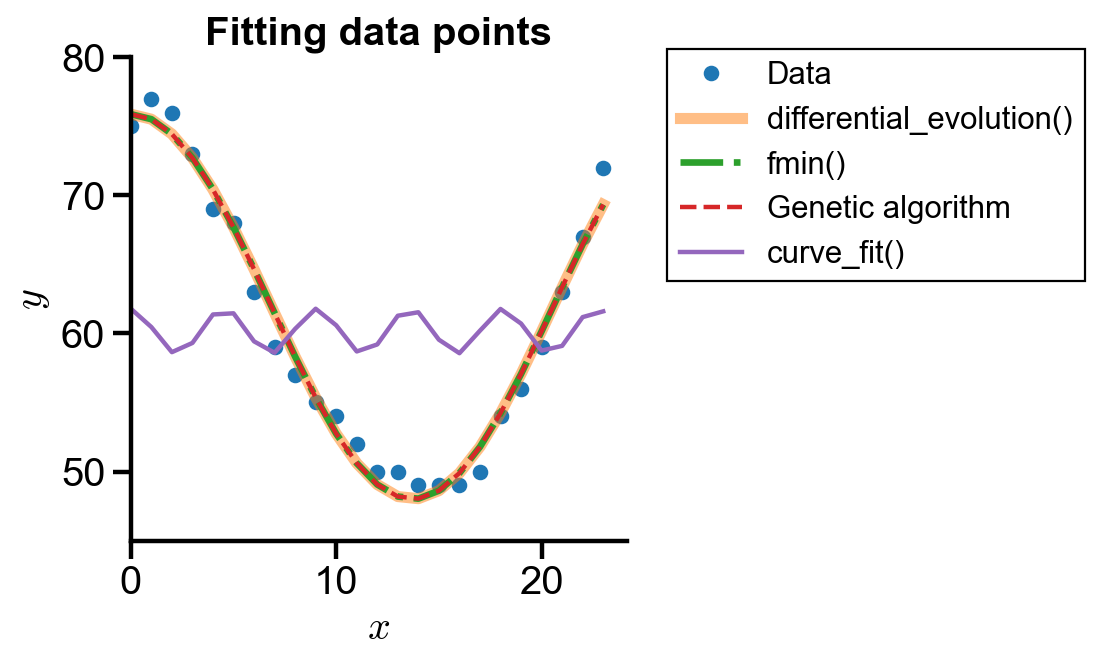

In [32]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(data_x, data_y, 'o', label='Data')
ax.plot(data_x, diff_evo_y, label='differential_evolution()', lw=5, alpha=0.5)
ax.plot(data_x, fmin_y, '-.', label='fmin()', lw=3)
ax.plot(data_x, genetic_y, '--', label='Genetic algorithm')
ax.plot(data_x, curve_fit_y, label='curve_fit()')
# plot settings
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('Fitting data points')
ax.set_xlim(0)
ax.set_ylim(45, 80)
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1.05))

The graph shows that the genetic algorithm implemented has comparable accuracy as `differential_evolution()` and `fmin()`. However, `curve_fit()` did not have good performance even with good initial guesses.